🔍 Persian Text Preprocessing Analysis
✅ Preprocessing report loaded
📊 Processing Summary:
  - Input comments: 2,200
  - Output comments: 1,487
  - Success rate: 67.59%
  - Duration: 13.00 seconds
✅ Loaded light: 2,200 comments
✅ Loaded medium: 1,497 comments
✅ Loaded heavy_stem: 1,458 comments
✅ Loaded heavy_lemma: 1,487 comments

📈 Text Statistics by Version:
--------------------------------------------------

LIGHT:
  Comments: 2,200
  Avg length: 78.4 chars
  Avg words: 15.3
  Unique rate: 81.41%

MEDIUM:
  Comments: 1,497
  Avg length: 60.4 chars
  Avg words: 10.8
  Unique rate: 99.13%

HEAVY_STEM:
  Comments: 1,458
  Avg length: 55.5 chars
  Avg words: 11.0
  Unique rate: 99.11%

HEAVY_LEMMA:
  Comments: 1,487
  Avg length: 59.9 chars
  Avg words: 10.9
  Unique rate: 98.99%

🎯 RUNNING PREPROCESSING ANALYSIS

📊 Creating visualizations...


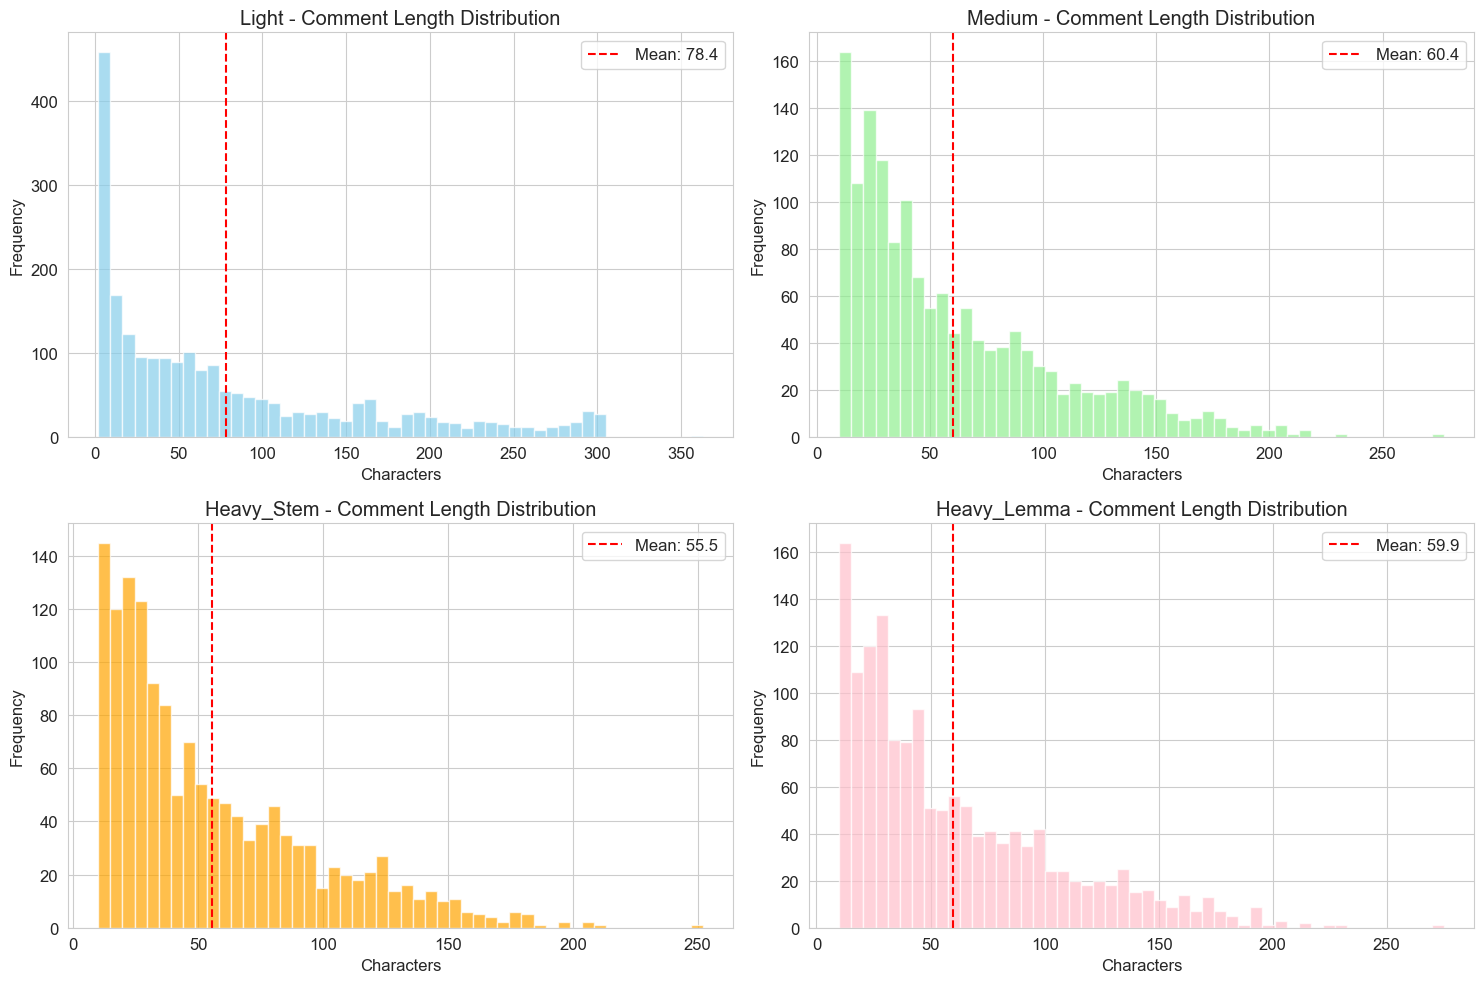

✅ Length distribution plots created


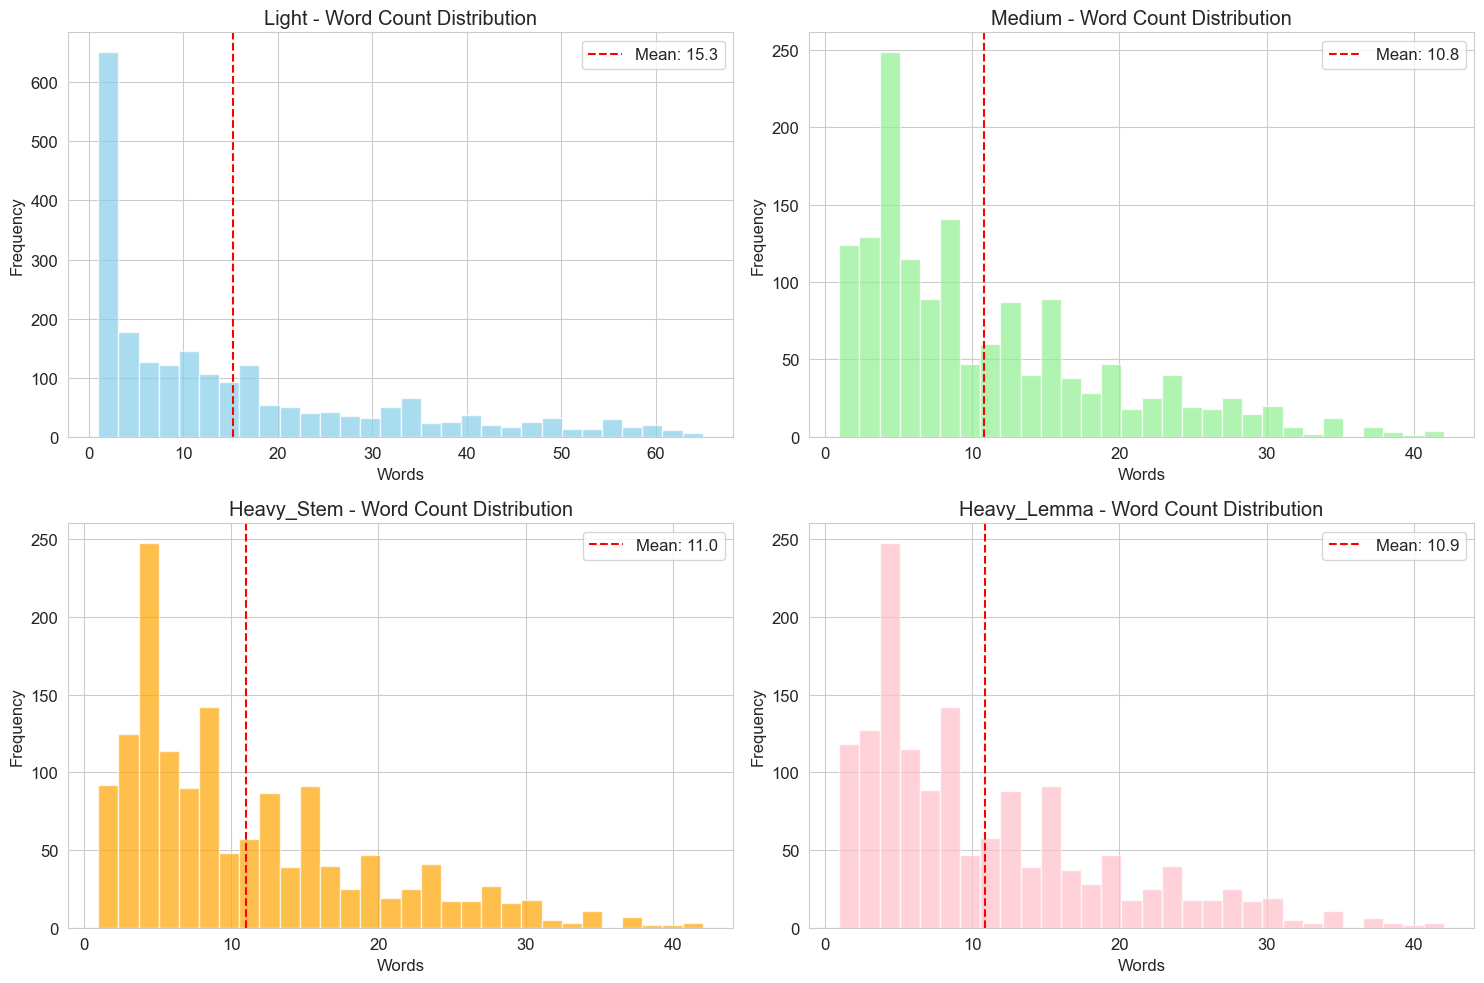

✅ Word count distribution plots created


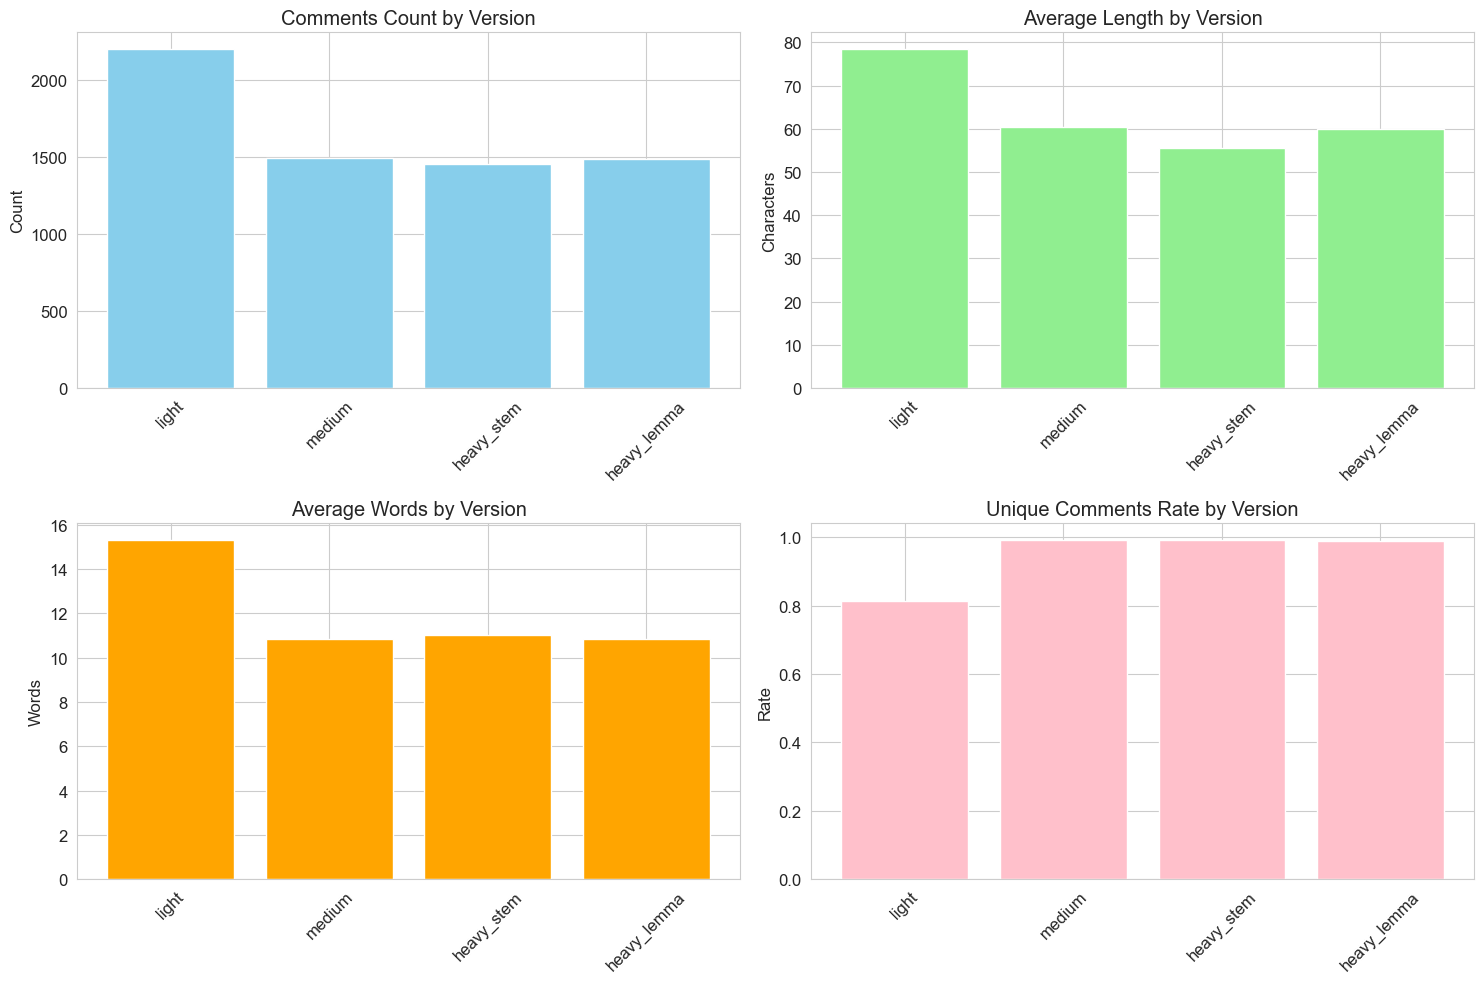

✅ Version comparison plots created

📝 Analyzing most common words...


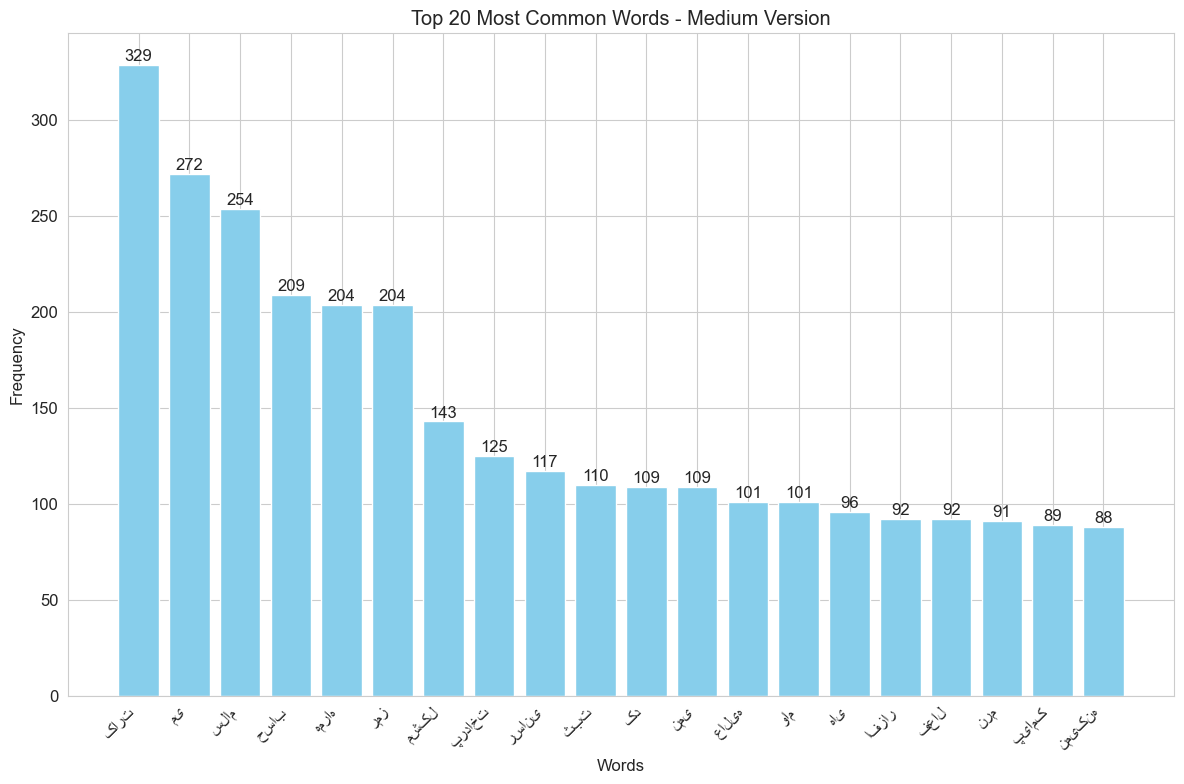

✅ Common words analysis completed

☁️ Creating word cloud...


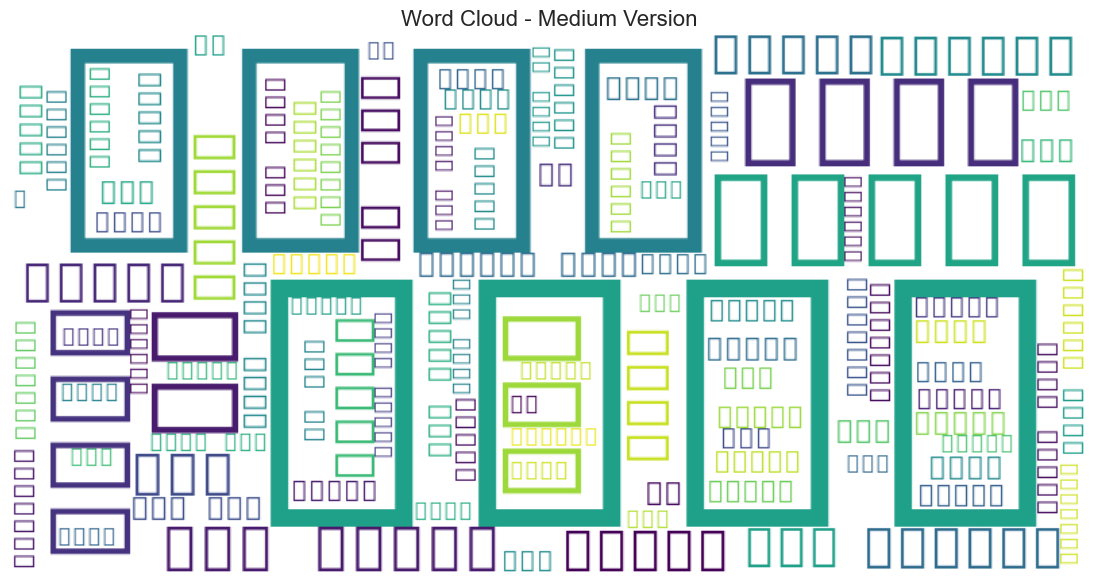

✅ Word cloud created

📋 Analysis summary saved to: c:\uni\nlp\iranian-backing-sentiment-nlp\results\reports\preprocessing_analysis_summary.json

✅ PREPROCESSING ANALYSIS COMPLETED

📊 Summary:
  - Versions analyzed: 4
  - Visualizations created: 5
  - Analysis completed successfully!

🎯 Recommendations:
  - Best version for modeling: medium
  - Use the 'medium' version for feature extraction and model training
  - Consider 'heavy_stem' or 'heavy_lemma' for specific modeling approaches

📁 Generated files saved in:
  - Figures: c:\uni\nlp\iranian-backing-sentiment-nlp\results\figures
  - Reports: c:\uni\nlp\iranian-backing-sentiment-nlp\results\reports

📈 Final Statistics Comparison:
    Version  Comments Avg Length Avg Words Unique Rate
      light      2200       78.4      15.3       81.4%
     medium      1497       60.4      10.8       99.1%
 heavy_stem      1458       55.5      11.0       99.1%
heavy_lemma      1487       59.9      10.9       99.0%

🎉 Analysis notebook completed succ

In [1]:
# Persian Banking Comments - Preprocessing Analysis
# This notebook analyzes the results of text preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import sys
from collections import Counter
from wordcloud import WordCloud
import re

# Add project root to path
project_root = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()
sys.path.append(str(project_root))

from config import PROCESSED_DATA_DIR, RESULTS_DIR, FIGURES_DIR
from src.preprocessing.persian_cleaner import PersianTextCleaner

# Setup plotting
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Tahoma', 'DejaVu Sans']
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

print("🔍 Persian Text Preprocessing Analysis")
print("=" * 50)

# ## 1. Load Preprocessing Results

# Load the preprocessing report
report_path = RESULTS_DIR / "reports" / "preprocessing_report.json"

if report_path.exists():
    with open(report_path, 'r', encoding='utf-8') as f:
        preprocessing_report = json.load(f)
    
    print("✅ Preprocessing report loaded")
    print(f"📊 Processing Summary:")
    summary = preprocessing_report['preprocessing_summary']
    print(f"  - Input comments: {summary['input_comments']:,}")
    print(f"  - Output comments: {summary['output_comments']:,}")
    print(f"  - Success rate: {summary['success_rate']:.2%}")
    print(f"  - Duration: {summary['duration_seconds']:.2f} seconds")
else:
    print("⚠️ Preprocessing report not found. Run preprocessing first.")
    preprocessing_report = None

# ## 2. Load Processed Data Versions

processed_versions = {}
version_files = {
    'light': PROCESSED_DATA_DIR / "comments_light_processed.csv",
    'medium': PROCESSED_DATA_DIR / "comments_medium_processed.csv", 
    'heavy_stem': PROCESSED_DATA_DIR / "comments_heavy_stem_processed.csv",
    'heavy_lemma': PROCESSED_DATA_DIR / "comments_heavy_lemma_processed.csv"
}

for version_name, file_path in version_files.items():
    if file_path.exists():
        df = pd.read_csv(file_path)
        processed_versions[version_name] = df
        print(f"✅ Loaded {version_name}: {len(df):,} comments")
    else:
        print(f"⚠️ {version_name} version not found: {file_path}")

if not processed_versions:
    print("❌ No processed versions found. Please run preprocessing first.")
    sys.exit(1)

# ## 3. Preprocessing Statistics Analysis

def analyze_text_statistics(df, text_column='comment_processed'):
    """Analyze text statistics for a dataframe"""
    stats = {
        'total_comments': len(df),
        'avg_length': df[text_column].str.len().mean(),
        'median_length': df[text_column].str.len().median(),
        'min_length': df[text_column].str.len().min(),
        'max_length': df[text_column].str.len().max(),
        'std_length': df[text_column].str.len().std(),
        'avg_words': df[text_column].str.split().str.len().mean(),
        'unique_comments': df[text_column].nunique(),
        'duplicate_rate': 1 - (df[text_column].nunique() / len(df))
    }
    return stats

# Calculate statistics for each version
print("\n📈 Text Statistics by Version:")
print("-" * 50)

version_stats = {}
for version_name, df in processed_versions.items():
    stats = analyze_text_statistics(df)
    version_stats[version_name] = stats
    
    print(f"\n{version_name.upper()}:")
    print(f"  Comments: {stats['total_comments']:,}")
    print(f"  Avg length: {stats['avg_length']:.1f} chars")
    print(f"  Avg words: {stats['avg_words']:.1f}")
    print(f"  Unique rate: {1-stats['duplicate_rate']:.2%}")

# ## 4. Visualization Functions

def plot_length_distribution():
    """Plot comment length distribution for all versions"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    colors = ['skyblue', 'lightgreen', 'orange', 'pink']
    
    for i, (version_name, df) in enumerate(processed_versions.items()):
        if i < len(axes):
            ax = axes[i]
            lengths = df['comment_processed'].str.len()
            
            ax.hist(lengths, bins=50, alpha=0.7, color=colors[i % len(colors)])
            ax.set_title(f'{version_name.title()} - Comment Length Distribution')
            ax.set_xlabel('Characters')
            ax.set_ylabel('Frequency')
            ax.axvline(lengths.mean(), color='red', linestyle='--', 
                      label=f'Mean: {lengths.mean():.1f}')
            ax.legend()
    
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / 'preprocessing_length_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_word_count_distribution():
    """Plot word count distribution for all versions"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    colors = ['skyblue', 'lightgreen', 'orange', 'pink']
    
    for i, (version_name, df) in enumerate(processed_versions.items()):
        if i < len(axes):
            ax = axes[i]
            word_counts = df['comment_processed'].str.split().str.len()
            
            ax.hist(word_counts, bins=30, alpha=0.7, color=colors[i % len(colors)])
            ax.set_title(f'{version_name.title()} - Word Count Distribution')
            ax.set_xlabel('Words')
            ax.set_ylabel('Frequency')
            ax.axvline(word_counts.mean(), color='red', linestyle='--',
                      label=f'Mean: {word_counts.mean():.1f}')
            ax.legend()
    
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / 'preprocessing_word_count_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_version_comparison():
    """Compare statistics across versions"""
    # Prepare data for comparison
    comparison_data = []
    for version_name, stats in version_stats.items():
        comparison_data.append({
            'Version': version_name,
            'Comments': stats['total_comments'],
            'Avg Length': stats['avg_length'],
            'Avg Words': stats['avg_words'],
            'Unique Rate': 1 - stats['duplicate_rate']
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Comments count
    axes[0, 0].bar(comparison_df['Version'], comparison_df['Comments'], color='skyblue')
    axes[0, 0].set_title('Comments Count by Version')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Average length
    axes[0, 1].bar(comparison_df['Version'], comparison_df['Avg Length'], color='lightgreen')
    axes[0, 1].set_title('Average Length by Version')
    axes[0, 1].set_ylabel('Characters')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Average words
    axes[1, 0].bar(comparison_df['Version'], comparison_df['Avg Words'], color='orange')
    axes[1, 0].set_title('Average Words by Version')
    axes[1, 0].set_ylabel('Words')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Unique rate
    axes[1, 1].bar(comparison_df['Version'], comparison_df['Unique Rate'], color='pink')
    axes[1, 1].set_title('Unique Comments Rate by Version')
    axes[1, 1].set_ylabel('Rate')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / 'preprocessing_version_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

def analyze_most_common_words(version_name='medium', top_n=20):
    """Analyze most common words in processed text"""
    if version_name not in processed_versions:
        print(f"Version '{version_name}' not available")
        return
    
    df = processed_versions[version_name]
    
    # Combine all processed text
    all_text = ' '.join(df['comment_processed'].fillna(''))
    
    # Extract words
    words = re.findall(r'\b\w+\b', all_text.lower())
    word_counts = Counter(words)
    
    # Get top words
    top_words = word_counts.most_common(top_n)
    
    # Plot
    words_list, counts_list = zip(*top_words) if top_words else ([], [])
    
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(len(words_list)), counts_list, color='skyblue')
    plt.title(f'Top {top_n} Most Common Words - {version_name.title()} Version')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(range(len(words_list)), words_list, rotation=45, ha='right')
    
    # Add count labels on bars
    for bar, count in zip(bars, counts_list):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                str(count), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / f'preprocessing_common_words_{version_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return top_words

def create_word_cloud(version_name='medium'):
    """Create word cloud for processed text"""
    if version_name not in processed_versions:
        print(f"Version '{version_name}' not available")
        return
    
    df = processed_versions[version_name]
    
    # Combine all processed text
    all_text = ' '.join(df['comment_processed'].fillna(''))
    
    if not all_text.strip():
        print("No text available for word cloud")
        return
    
    # Create word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        font_path=None,  # Use default font
        colormap='viridis'
    ).generate(all_text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {version_name.title()} Version', fontsize=16)
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / f'preprocessing_wordcloud_{version_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

# ## 5. Sentiment Analysis Integration

def analyze_sentiment_preprocessing_impact():
    """Analyze impact of preprocessing on sentiment labels"""
    # Check if we have labeled data
    labeled_files = [
        PROCESSED_DATA_DIR / "comments_light_processed.csv",
        PROCESSED_DATA_DIR / "comments_medium_processed.csv"
    ]
    
    sentiment_analysis = {}
    
    for file_path in labeled_files:
        if file_path.exists():
            df = pd.read_csv(file_path)
            if 'sentiment_label' in df.columns:
                version_name = file_path.stem.replace('comments_', '').replace('_processed', '')
                
                # Analyze sentiment distribution
                sentiment_dist = df['sentiment_label'].value_counts(normalize=True)
                
                # Analyze text length by sentiment
                sentiment_lengths = df.groupby('sentiment_label')['comment_processed'].str.len().mean()
                
                sentiment_analysis[version_name] = {
                    'sentiment_distribution': sentiment_dist.to_dict(),
                    'avg_length_by_sentiment': sentiment_lengths.to_dict()
                }
    
    if sentiment_analysis:
        print("\n💭 Sentiment Analysis Impact:")
        print("-" * 50)
        
        for version_name, analysis in sentiment_analysis.items():
            print(f"\n{version_name.upper()}:")
            print("  Sentiment distribution:")
            for sentiment, ratio in analysis['sentiment_distribution'].items():
                print(f"    {sentiment}: {ratio:.2%}")
            
            print("  Avg length by sentiment:")
            for sentiment, length in analysis['avg_length_by_sentiment'].items():
                print(f"    {sentiment}: {length:.1f} chars")
    
    return sentiment_analysis

# ## 6. Run Analysis

print("\n" + "="*50)
print("🎯 RUNNING PREPROCESSING ANALYSIS")
print("="*50)

# Create figures directory
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

# Generate visualizations
print("\n📊 Creating visualizations...")

plot_length_distribution()
print("✅ Length distribution plots created")

plot_word_count_distribution()
print("✅ Word count distribution plots created")

plot_version_comparison()
print("✅ Version comparison plots created")

# Analyze common words for medium version
if 'medium' in processed_versions:
    print("\n📝 Analyzing most common words...")
    top_words = analyze_most_common_words('medium', top_n=20)
    print("✅ Common words analysis completed")
    
    print("\n☁️ Creating word cloud...")
    create_word_cloud('medium')
    print("✅ Word cloud created")

# Sentiment analysis impact
sentiment_impact = analyze_sentiment_preprocessing_impact()

# ## 7. Generate Summary Report

def generate_analysis_summary():
    """Generate a summary of preprocessing analysis"""
    summary = {
        'analysis_timestamp': pd.Timestamp.now().isoformat(),
        'versions_analyzed': list(processed_versions.keys()),
        'version_statistics': version_stats,
        'sentiment_impact': sentiment_impact if 'sentiment_impact' in locals() else {},
        'recommendations': {
            'best_version_for_modeling': 'medium',  # Based on balance of cleaning and information retention
            'reasons': [
                'Good balance between noise removal and information retention',
                'Maintains semantic meaning while removing irrelevant content',
                'Suitable tokenization for feature extraction'
            ]
        }
    }
    
    # Save summary
    summary_path = RESULTS_DIR / "reports" / "preprocessing_analysis_summary.json"
    summary_path.parent.mkdir(parents=True, exist_ok=True)
    
    with open(summary_path, 'w', encoding='utf-8') as f:
        json.dump(summary, f, ensure_ascii=False, indent=2, default=str)
    
    print(f"\n📋 Analysis summary saved to: {summary_path}")
    
    return summary

analysis_summary = generate_analysis_summary()

print("\n" + "="*50)
print("✅ PREPROCESSING ANALYSIS COMPLETED")
print("="*50)

print(f"\n📊 Summary:")
print(f"  - Versions analyzed: {len(processed_versions)}")
print(f"  - Visualizations created: {len(list(FIGURES_DIR.glob('preprocessing_*.png')))}")
print(f"  - Analysis completed successfully!")

print(f"\n🎯 Recommendations:")
print(f"  - Best version for modeling: {analysis_summary['recommendations']['best_version_for_modeling']}")
print(f"  - Use the 'medium' version for feature extraction and model training")
print(f"  - Consider 'heavy_stem' or 'heavy_lemma' for specific modeling approaches")

print(f"\n📁 Generated files saved in:")
print(f"  - Figures: {FIGURES_DIR}")
print(f"  - Reports: {RESULTS_DIR / 'reports'}")

# Display final statistics table
print(f"\n📈 Final Statistics Comparison:")
comparison_df = pd.DataFrame([
    {
        'Version': name,
        'Comments': stats['total_comments'],
        'Avg Length': f"{stats['avg_length']:.1f}",
        'Avg Words': f"{stats['avg_words']:.1f}",
        'Unique Rate': f"{(1-stats['duplicate_rate'])*100:.1f}%"
    }
    for name, stats in version_stats.items()
])

print(comparison_df.to_string(index=False))

print(f"\n🎉 Analysis notebook completed successfully!")